<h1 style="text-align:center;">Funciones de activación</h1>

![Neurona con una función de activación](https://miro.medium.com/max/1400/0*1QFveOPhuMjZPHTs.png)

Una función de activación en una red neuronal define como se transformará la suma poderada de los inputs en un output para cada nodo en la cap de una red.

> Si queremos conseguir un hypothesis space que beneficie a nuestras representaciones de deep learning, necesitamos añadir una non-linearity, o función de activación.

[Activation functions](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=Activation%20functions%20are%20a%20critical,design%20of%20a%20neural%20network.&text=Activation%20functions%20are%20a%20key,the%20type%20of%20prediction%20problem.)

Una red formada solamente por neuronas lineales (sin funciones de activación) es muy facil de entrenar, pero no puede aprender de funciones más complejas ya que el output de la red es siempre una función lineal.

Por lo tanto, las funciones de activación no-lineares son preferibles ya que nos permiten que el output de la red sea más complejo que solamente una función lineal.

Tradicionalmente se utilizaron dos funciones de activación no lineares: la sigmoid y la hyperbolic tangent.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid (Logistic function)

$sigm(x) = \frac{1}{1 + e^{-x}}$

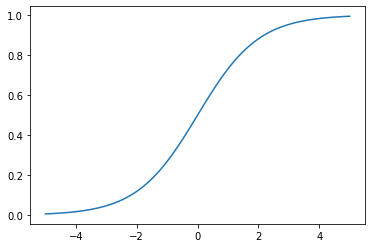

In [3]:
x = np.linspace(-5, 5, 100)
y = 1/(1 + np.exp(-x))

plt.plot(x, y)
plt.show()

# Hyperbolic tangent (tanh)

$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

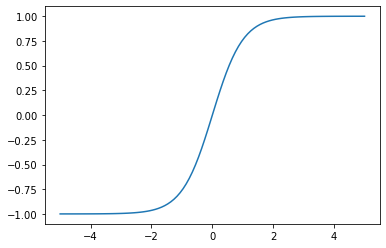

In [4]:
x = np.linspace(-5, 5, 100)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

plt.plot(x, y)
plt.show()

La función de activación `tanh` suele dar mejores resultados que la sigmoide.

# Problema con la sigmoide y tanh

Un problema con estas dos funciones de activación es **se saturan**. Es decir, en el mejor de los casos (la función tanh), los valores más grandes se ajustan a 1 y los valores más pequeños se ajustan a 0. Esto hace que se reduzcan todos los valores de los inputs a -1 a 1.

Para aquellas redes que tienen solo unas pocas capas con activaciones, este no supone un problema.

Sin embargo, a medida que vamos añadiendo capas, esto hace que el gradiente sea demasiado pequeño como para entrenar a la red de forma efectiva.

Esto se debe a que un gradiente muy pequeño hará que las ponderaciones y los biases de las capaas iniciales no se actualizarán correctamente en cada sesión de entrenamiento.

# Solución

La solución más sencilla es utilizar otras funciones de activación como ReLU que evitan dar lugar a derivadas muy pequeñas.

Otras 2 soluciones son:
- Residual networks
- Batch normalization layers

# ReLU

$$f(x) = max(0.0, x)$$

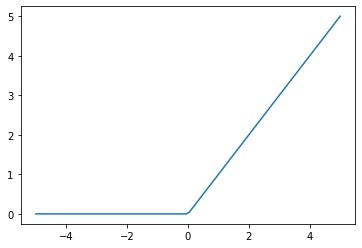

In [10]:
x = np.linspace(-5, 5, 100)
y = np.maximum(0.0, x)

plt.plot(x, y)
plt.show()

# Swish

Función de activación desarrollada en Google que tiene los mismos o mejores resultados que ReLU en deep networks. Fue creada para aplacar dominios más complicados del deep learning como el image classification, machine translation, etc. y es utilizado para trabajar con muchas capas (>= 40).

$$swish(x) = x * sigm(x) = \frac{x}{1 + e^{-x}}$$

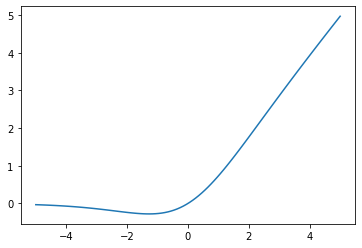

In [11]:
x = np.linspace(-5, 5, 100)
y = x / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()

- Los valores negativos también pueden tener valor para capturar patrones en los datos, así que Swish les da cierto valor. Sin embargo, valores negativo muy grandes son considerados 0.

- Swish es una función más "suave" que evita ese cambio abruto que realiza ReLU en el cero.

- Swish no es monótona y esto hace que se mejore el aprendizaje en los datos y ponderaciones a aprender.

# Funciones de activación para la output layer

La output layer es la capa de la red que directamente devuelve la predicción.

Principalmente, existen 3 funciones de activación que se utilizan:
- Linear
- Logistic (sigmoid)
- Softmax

# Linear ("no activation")

Devuelve el valor directamente de la suma ponderada de valores, sin utilizar una función de activación.

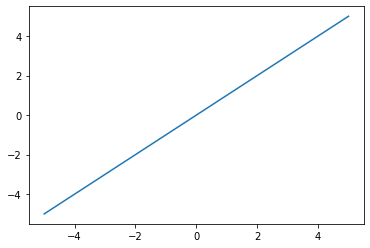

In [7]:
x = np.linspace(-5, 5, 100)
y = x

plt.plot(x, y)
plt.show()

# Sigmoid (logistic)

Igual que la tratada anteriormente

# Softmax

Devuelve un vector de valores que suman 1.

$$softmax(x) = \frac{exp(x_i)}{\sum{exp(x_i)}}$$

Softmax es utilizada cuando estamos haciendo una tarea de **clasificación de varias clases**. En cambio, la función sigmoide la utilizaríamos cuando tenemos una clasificación binaria.

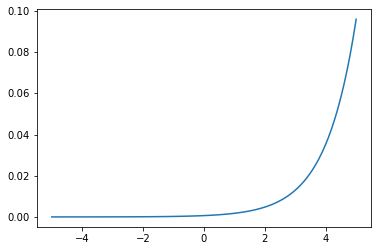

In [8]:
x = np.linspace(-5, 5, 100)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.show()

![Como escoger una función de activación en la output layer](https://machinelearningmastery.com/wp-content/uploads/2020/12/How-to-Choose-an-Output-Layer-Activation-Function.png)

# ¿Qué función de activación elegimos?

Una práctica que se suele seguir, es empezar utilizando la función de activación ReLU y después utilizar otras funciones de activación si ReLU no nos da los mejores resultados.

1. ReLU debería utilizarse solamente en las hidden layers.
2. Sigmoid/Logistic y TanH no se debería utilizar en las hidden layers por el problema de los vanishing gradients.
3. Si la red neuronal tiene más de 40 layers, podemos utilizar la Swish function.

# Otras funciones de activación

# Leaky ReLU

El problema de ReLU es que hace que todos los valores negativos sean 0. Esto provoca que, durante el proceso de backpropagation, las ponderaciones y biases de algunas neuronas no se actualicen.

Esto provoca que se creen neuronas 'muertas' que nunca se activan. A esto se le denomina el **dying ReLU problem**.

LeakyReLU es una versión mejorada de ReLU que tiene una pendiente positiva en la parte de los números negativos:

$$f(x) = max(0.1x, x)$$

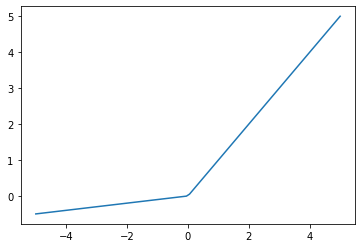

In [12]:
x = np.linspace(-5, 5, 100)
y = np.maximum(0.1*x, x)

plt.plot(x, y)
plt.show()

Sin embargo:

- Las predicciones pueden no ser consistentes para valores de input negativos.

- El gradiente para valores negativos es un valor pequeño que hace que el aprender de los parámetros del modelo lleve más tiempo.

# Parametric ReLU

Es orta variante de ReLU que trata de resolver el dying ReLU problem.

$$f(x) = max(ax, x)$$, a es la pendiente de los parámetros para los valores negativos.

Esta función de activación se utiliza cuando la Leaky ReLU no resuelve el problema con las neuronas que no se activan.

La limitación de esta es que puede funcionar diferente según el parámetro de la pendiente `a`.

# Exponential Linear Units (ELUs) Function

# Gaussian Error Linear Unit (GELU)

![ELU, RELU, GELU](https://assets.website-files.com/5d7b77b063a9066d83e1209c/60d24ce0ff3fd3ff13b04ef7_pasted%20image%200%20(17).jpg)

# Scaled Exponential Linear Unit (SELU)

[Otras funciones de activación](https://cup-of-char.com/writing-activation-functions-from-mostly-scratch-in-python/)